In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
LoL_stats = pd.read_csv('LoL_Player_Stats.csv')
LoL_stats.head()

,TeamName,PlayerName,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSPerMin,...,Avg VWPM,GD@15,CSD@15,XPD@15,FB %,FB Victim,Penta Kills,Solo Kills,Country,FlashKeybind
0,Top Esports,369,Top,8,0.500,3.1,2.5,2.4,4.9,7.6,...,0.13,322,5,424,0.000,0.25,0,2,China,D
1,Dplus KIA,aiming,Adc,9,0.333,4.8,5.0,2.0,4.7,10.1,...,0.10,-112,1,97,0.333,0.00,0,2,South Korea,F
2,MAD Lions KOI,alvaro,Support,5,0.200,1.5,0.2,4.4,6.2,1.2,...,0.49,-3,2,-256,0.000,0.60,0,-,Spain,D
3,Team Liquid,apa,Mid,10,0.500,2.4,3.5,3.2,4.2,8.7,...,0.18,278,2,216,0.400,0.00,0,3,United States,D
4,PSG Talon,azhi,Top,5,0.200,2.3,2.2,3.0,4.8,7.5,...,0.18,-311,-10,-168,0.200,0.00,0,-,Taiwan,D


In [186]:
LoL_stats.columns

Index(['TeamName', 'PlayerName', 'Position', 'Games', 'Win rate', 'KDA',
       'Avg kills', 'Avg deaths', 'Avg assists', 'CSPerMin', 'GoldPerMin',
       'KP%', 'DamagePercent', 'DPM', 'VSPM', 'Avg WPM', 'Avg WCPM',
       'Avg VWPM', 'GD@15', 'CSD@15', 'XPD@15', 'FB %', 'FB Victim',
       'Penta Kills', 'Solo Kills', 'Country', 'FlashKeybind'],
      dtype='object')

In [190]:
Stats_Cleaned = LoL_stats.drop(columns=["PlayerName", "Games", "Win rate", "Penta Kills", "Country"])
Stats_Cleaned.head()

,TeamName,Position,KDA,Avg kills,Avg deaths,Avg assists,CSPerMin,GoldPerMin,KP%,DamagePercent,...,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,FB %,FB Victim,Solo Kills,FlashKeybind
0,Top Esports,Top,3.1,2.5,2.4,4.9,7.6,373,0.532,0.219,...,0.38,0.11,0.13,322,5,424,0.000,0.25,2,D
1,Dplus KIA,Adc,4.8,5.0,2.0,4.7,10.1,449,0.815,0.308,...,0.39,0.34,0.10,-112,1,97,0.333,0.00,2,F
2,MAD Lions KOI,Support,1.5,0.2,4.4,6.2,1.2,233,0.622,0.079,...,1.91,0.52,0.49,-3,2,-256,0.000,0.60,-,D
3,Team Liquid,Mid,2.4,3.5,3.2,4.2,8.7,418,0.592,0.266,...,0.58,0.32,0.18,278,2,216,0.400,0.00,3,D
4,PSG Talon,Top,2.3,2.2,3.0,4.8,7.5,357,0.542,0.208,...,0.43,0.23,0.18,-311,-10,-168,0.200,0.00,-,D


In [191]:
Stats_Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TeamName       81 non-null     object 
 1   Position       81 non-null     object 
 2   KDA            81 non-null     float64
 3   Avg kills      81 non-null     float64
 4   Avg deaths     81 non-null     float64
 5   Avg assists    81 non-null     float64
 6   CSPerMin       81 non-null     float64
 7   GoldPerMin     81 non-null     int64  
 8   KP%            81 non-null     float64
 9   DamagePercent  81 non-null     float64
 10  DPM            81 non-null     int64  
 11  VSPM           81 non-null     float64
 12  Avg WPM        81 non-null     float64
 13  Avg WCPM       81 non-null     float64
 14  Avg VWPM       81 non-null     float64
 15  GD@15          81 non-null     int64  
 16  CSD@15         81 non-null     int64  
 17  XPD@15         81 non-null     int64  
 18  FB %        

In [192]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(Stats_Cleaned["FlashKeybind"])
Stats_Cleaned['FlashKeybind'] = le.transform(Stats_Cleaned["FlashKeybind"])
Stats_Cleaned.head()


,TeamName,Position,KDA,Avg kills,Avg deaths,Avg assists,CSPerMin,GoldPerMin,KP%,DamagePercent,...,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,FB %,FB Victim,Solo Kills,FlashKeybind
0,Top Esports,Top,3.1,2.5,2.4,4.9,7.6,373,0.532,0.219,...,0.38,0.11,0.13,322,5,424,0.000,0.25,2,0
1,Dplus KIA,Adc,4.8,5.0,2.0,4.7,10.1,449,0.815,0.308,...,0.39,0.34,0.10,-112,1,97,0.333,0.00,2,1
2,MAD Lions KOI,Support,1.5,0.2,4.4,6.2,1.2,233,0.622,0.079,...,1.91,0.52,0.49,-3,2,-256,0.000,0.60,-,0
3,Team Liquid,Mid,2.4,3.5,3.2,4.2,8.7,418,0.592,0.266,...,0.58,0.32,0.18,278,2,216,0.400,0.00,3,0
4,PSG Talon,Top,2.3,2.2,3.0,4.8,7.5,357,0.542,0.208,...,0.43,0.23,0.18,-311,-10,-168,0.200,0.00,-,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

training_stats = Stats_Cleaned.drop(columns=['FlashKeybind'])
training_stats = np.array(training_stats.select_dtypes(include='number'))
labels = np.array(Stats_Cleaned['FlashKeybind'])

stats_train, stats_test, labels_train, labels_test = train_test_split(training_stats, labels, test_size=0.1, random_state=110)

LoL_forest = RandomForestClassifier(n_estimators=100, random_state=110)
LoL_forest.fit(stats_train, labels_train)

LoL_forest.score(stats_test, labels_test)

0.4444444444444444

In [ ]:
# Variation 2 of Forest
LoL_forest2 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=110)
LoL_forest2.fit(stats_train, labels_train)
LoL_forest2.score(stats_test,labels_test)

0.5555555555555556

In [ ]:
# Variation 3 of Forest
LoL_forest3 = RandomForestClassifier(n_estimators=100, max_features=2, random_state=110)
LoL_forest3.fit(stats_train, labels_train)
LoL_forest3.score(stats_test, labels_test)

0.6666666666666666

In [ ]:
# Examination of forest variations
Forest1_importance = list(zip(Stats_Cleaned.select_dtypes(include='number').columns, LoL_forest.feature_importances_))
Forest2_importance = list(zip(Stats_Cleaned.select_dtypes(include='number').columns, LoL_forest2.feature_importances_))
Forest3_importance = list(zip(Stats_Cleaned.select_dtypes(include='number').columns, LoL_forest3.feature_importances_))

print(Forest1_importance)
Forest1_sorted = sorted(Forest1_importance, key=lambda x: x[1], reverse=True)
print(Forest1_sorted[:5])

print()

print(Forest2_importance)
Forest2_sorted = sorted(Forest2_importance, key=lambda x: x[1], reverse=True)
print(Forest2_sorted[:5])

print()

print(Forest3_importance)
Forest3_sorted = sorted(Forest3_importance, key=lambda x: x[1], reverse=True)
print(Forest3_sorted[:5])



[('KDA', 0.08048679087919354), ('Avg kills', 0.04675616401043114), ('Avg deaths', 0.09061384775509226), ('Avg assists', 0.039766788829663904), ('CSPerMin', 0.04486786450436203), ('GoldPerMin', 0.043419111984272646), ('KP%', 0.07012781487464846), ('DamagePercent', 0.05019003890726467), ('DPM', 0.06174715012469749), ('VSPM', 0.049049097968961446), ('Avg WPM', 0.0522802727521068), ('Avg WCPM', 0.04903380434880639), ('Avg VWPM', 0.050172178730762206), ('GD@15', 0.05378998781083544), ('CSD@15', 0.04380147922071439), ('XPD@15', 0.08847819057482367), ('FB %', 0.048966730091794426), ('FB Victim', 0.03645268663156913)]
[('Avg deaths', 0.09061384775509226), ('XPD@15', 0.08847819057482367), ('KDA', 0.08048679087919354), ('KP%', 0.07012781487464846), ('DPM', 0.06174715012469749)]

[('KDA', 0.07783167262579564), ('Avg kills', 0.05273709022541138), ('Avg deaths', 0.08235536635808115), ('Avg assists', 0.04654984588626248), ('CSPerMin', 0.040436458403849344), ('GoldPerMin', 0.04600453385288289), ('KP%

In [ ]:
# Additional Statistical Analysis
print(le.inverse_transform([0,1]))
Stats_Cleaned[['FlashKeybind', 'Avg deaths']].corr(numeric_only=True)

['D' 'F']


,FlashKeybind,Avg deaths
FlashKeybind,1.000000,-0.224886
Avg deaths,-0.224886,1.000000


<Axes: xlabel='FlashKeybind', ylabel='Avg deaths'>

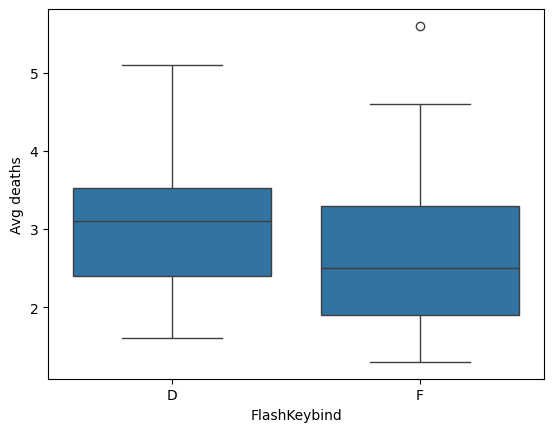

In [234]:
import seaborn as sns

sns.boxplot(x='FlashKeybind', y='Avg deaths', data=LoL_stats)

In [237]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [239]:
def find_best_params_forest(training_x, testing_x, training_y, testing_y):
  max_depth = np.arange(1,11)
  min_samples_leaf = np.arange(1,6)
  max_features = np.arange(1,6)


  best_score = 0
  best_max_depth = None
  best_min_samples_leaf = None
  best_max_features = None



  for depth in max_depth:
    for leaf in min_samples_leaf:
      for feature in max_features:
        LoL_forest_p = RandomForestClassifier(criterion="entropy", max_depth = depth, min_samples_leaf = leaf, max_features = feature, random_state=0)
        LoL_forest_p.fit(training_x, training_y)
        score = LoL_forest_p.score(testing_x, testing_y)
        if score > best_score:
          best_score = score
          best_max_depth = depth
          best_min_samples_leaf = leaf
          best_max_features = feature

  return best_score, best_max_depth, best_min_samples_leaf, best_max_features

find_best_params_forest(stats_train, stats_test, labels_train, labels_test)

(0.6666666666666666, 3, 5, 5)

**Project Discussion**
---

The purpose of this project was to develop a machine learning algorithm capable of predicting the desired user preferences of an end user through various collecte data unrelated to the preference in question. The keybinding for the flash ability in League of Legends represents a high impact user preference with strong opinions held by both sides of the community. This project proves that machine learning algorithms can produce a reasonably accurate guess of a user's desired preferences despite not having any particular data directly related to the preference itself.

---
By analyzing the player statistics of all matches in the recent World Championships, I built the decision tree forest to try and classify players keybind preference based on their in-game performance. The machine learning was unsurprisingly not extremely effective since in many ways the decision is down to personal preference. However, by creating a function to determine some ideal parameters, the learner was able to max out at a .667 score (max_depth=3, min_samples_leaf=5, max_features=5).

---

After analyzing the relative importance of each feature, it was clear that while no feature was particularly important, the "Average Deaths" feature was consistently one of the highest rated feature (even if only slightly). This makes sense because the Flash ability is most often used to dodge attacks that are likely to cause a player's death. By analyzing the correlation between the two possible keybinds and visualizing it through Seaborn boxplots, it is clear that players who used the F keybind for Flash had lower deaths on average. The boxplot shows that both the mean and upper quartile for F keybind players is less than D keybind players, even with an outlier impacting the distribution.
